# CRISP DM ON HOUSING DATASET
## 

### Phase 1: Business Understanding

__OBJECTIVE:__ 
- To predict MO (Number of minors per residence).
- This can help planners identify neighborhoods which attract families with children.
- It also helps to predict the demand for child related services like schools and play areas. 

### Phase 2: Data Understanding

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# Load the data from the Excel file
df = pd.read_excel("HousingData.xlsx", sheet_name="HousingData")
df.head()

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
0,101,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,2.0,296.0
1,102,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,2.0,242.0
2,103,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,292.40,4.03,3.0,242.0
3,104,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,0.0,222.0
4,105,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,0.0,222.0


In [3]:
# Describe the data
print("Data Description:")
df.describe()

Data Description:


,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
count,506.000000,504.000000,506.000000,506.000000,504.000000,503.000000,502.000000,502.00000,503.000000,504.000000,503.000000,502.000000,505.000000,504.000000,505.000000
mean,353.500000,3.604056,11.363636,11.136779,0.069444,0.554164,6.285307,68.53008,3.796207,9.492063,18.443539,305.414530,12.654099,0.644841,407.726733
std,146.213884,8.609134,23.322453,6.860353,0.254461,0.115830,0.704098,28.13882,2.103234,8.676649,2.165602,142.836519,7.148104,1.794307,168.312294
min,101.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.90000,1.129600,1.000000,12.600000,0.320000,1.730000,0.000000,187.000000
25%,227.250000,0.082155,0.000000,5.190000,0.000000,0.449000,5.885500,45.02500,2.100350,4.000000,17.350000,293.572500,6.930000,0.000000,279.000000
50%,353.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.50000,3.215700,5.000000,19.000000,386.910000,11.340000,0.000000,330.000000
75%,479.750000,3.674808,12.500000,18.100000,0.000000,0.624000,6.623500,93.97500,5.164950,24.000000,20.200000,394.997500,16.960000,0.000000,666.000000
max,606.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,22.000000,396.900000,37.970000,19.000000,711.000000


In [4]:
# Column names
print("Column Names:")
df.columns 

Column Names:


Index(['PID', 'CRIM', 'AC', 'INDUS', 'LS', 'PR', 'RM', 'AGE', 'DIS', 'RAD',
       'PTRATIO', 'DMT', 'LSTAT', 'MO', 'TAX'],
      dtype='object')

In [5]:
# Data info
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PID      506 non-null    int64  
 1   CRIM     504 non-null    float64
 2   AC       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   LS       504 non-null    float64
 5   PR       503 non-null    float64
 6   RM       502 non-null    float64
 7   AGE      502 non-null    float64
 8   DIS      503 non-null    float64
 9   RAD      504 non-null    float64
 10  PTRATIO  503 non-null    float64
 11  DMT      502 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MO       504 non-null    float64
 14  TAX      505 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


All columns have the float datatype, except PID having int.

In [6]:
# Explore data: Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
PID        0
CRIM       2
AC         0
INDUS      0
LS         2
PR         3
RM         4
AGE        4
DIS        3
RAD        2
PTRATIO    3
DMT        4
LSTAT      1
MO         2
TAX        1
dtype: int64


Some columns have missing values ranging between 1 to 4. 

In [7]:
# Shape of the dataset
df.shape

(506, 15)

The dataset has 15 columns and 506 rows. 

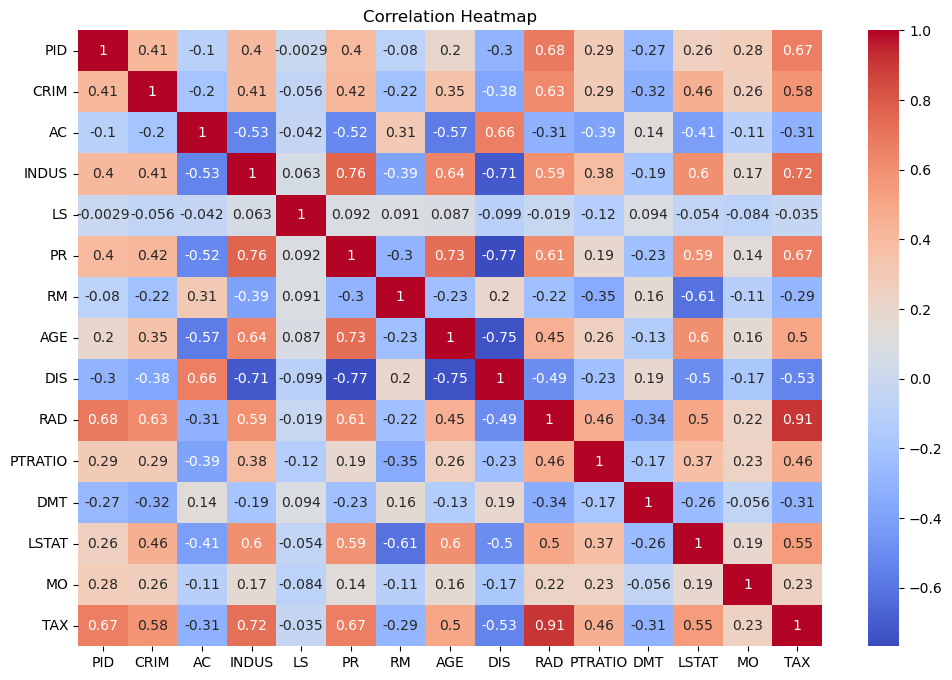

In [8]:
# Visualize correlations with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

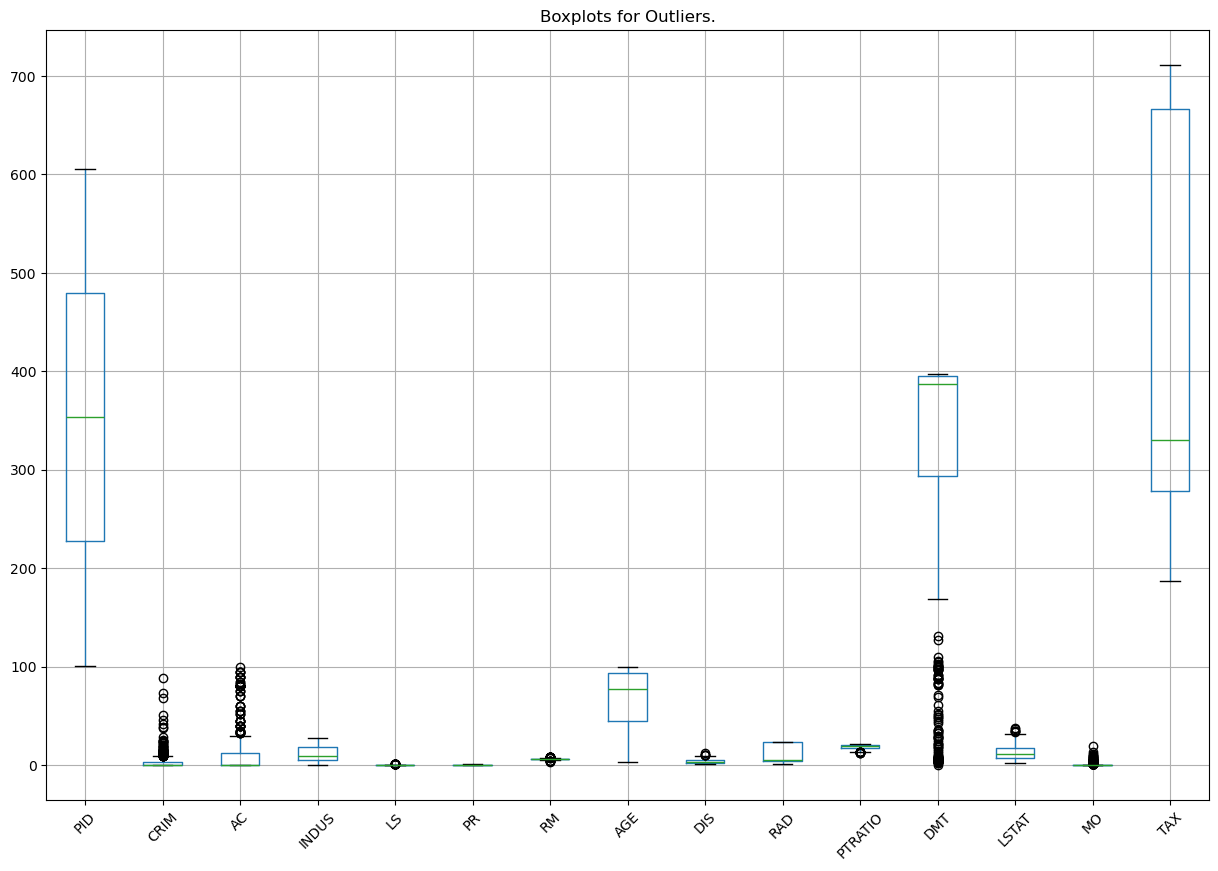

In [9]:
num_cols = df.select_dtypes(include=['float64','int64']).columns

plt.figure(figsize=(15,10))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplots for Outliers.")
plt.show()

In [10]:
# Checking for duplicates 
df.duplicated().sum()

0

The dataset has no duplicate entries. 

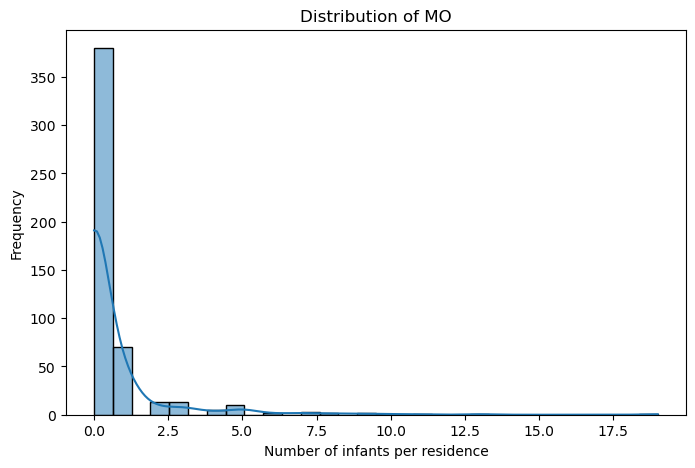

In [11]:
# Checking if the data is normalised
plt.figure(figsize=(8,5))
sns.histplot(df['MO'], bins=30, kde=True)
plt.title("Distribution of MO")
plt.xlabel("Number of infants per residence")
plt.ylabel("Frequency")
plt.show()

The data for MO is skewed to the right. 

In [12]:
# Check skewness
skewness = df.skew().sort_values(ascending=False)
print("Skewness of columns:\n", skewness)

Skewness of columns:
 CRIM       5.231785
MO         4.891492
LS         3.397542
AC         2.225666
RAD        1.021006
DIS        1.016357
LSTAT      0.905148
PR         0.738762
TAX        0.675963
RM         0.402240
INDUS      0.295022
PID        0.000000
AGE       -0.600112
PTRATIO   -0.795056
DMT       -1.303393
dtype: float64


### Phase 3: Data Preparation

In [13]:
# Dropping the identifier as it is not important
df = df.drop(columns=["PID"])

In [14]:
# Dropping rows with missing values
df = df.dropna()

This is because the number of missing values is very small. 

In [15]:
# Apply log1p transformation to skewed columns (threshold = abs(skew) > 0.5)
skewed_cols = skewness[abs(skewness) > 0.5].index
df = df.copy()
df[skewed_cols] = np.log1p(df[skewed_cols])

In [16]:
# Outlier capping 
# Columns identified with outliers
cols_to_clip = ["CRIM", "AC", "AGE", "DIS", "RAD", "PTRATIO", "DMT", "LSTAT", "MO"]

# Clip values to 1st and 99th percentile based on training set
df = df.copy()

for col in cols_to_clip:
    q1 = df[col].quantile(0.01)
    q99 = df[col].quantile(0.99)
    df[col] = df[col].clip(q1, q99)

In [18]:
X = df[["CRIM", "RAD", "PTRATIO", "TAX"]]
y = df["MO"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Phase 4: Modeling

#### Poisson Regression